## Kaggle Dataset

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Conv2D,Dense,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from skimage import io
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/OpenCV/'

In [ ]:
os.listdir(path)

['data.zip',
 'ocr-handwriting-models.zip',
 'tesseract.exe',
 'sample4.jpg',
 'ocr.zip',
 'Weights']

Un-comment it for the first time

In [ ]:
#!unzip '/content/drive/My Drive/OpenCV/ocr.zip' -d '/tmp/'

In [ ]:
#!unzip '/tmp/train.zip' -d '/train'

In [ ]:
#!unzip '/tmp/test.zip' -d '/test'

In [ ]:
os.listdir('/tmp/')

['trainResized.zip',
 'train.zip',
 'tmp0m68zdma.py',
 'resizeData.py',
 'drivefs_ipc.0',
 'trainLabels.csv',
 'tmpd46jd96b.py',
 'source-code-files.zip',
 'tmpyvy9rmt_.py',
 'sampleSubmission.csv',
 '__pycache__',
 'testResized.zip',
 'drivefs_ipc.0_shell',
 'tmp6cdkow1r',
 'test.zip']

In [ ]:
os.listdir('/train/')
train_path = '/train/train/'

In [ ]:
os.listdir('/test/')
test_path = '/test/test/'

### EDA

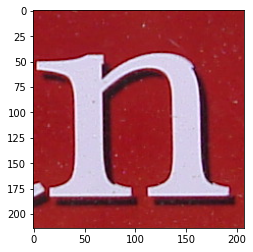

In [ ]:
from matplotlib.image import imread
img=imread(f'{train_path}/1.Bmp')
plt.imshow(img)

In [ ]:
train=[io.imread(f'{train_path}'+str(i)+'.Bmp',as_gray=True) for i in range(1,6283)]
#plt.imshow(train[1])
train[1]

array([[0.47126667, 0.47462275, 0.47854431, ..., 0.47321608, 0.47321608,
        0.46929451],
       [0.47070118, 0.47462275, 0.47462275, ..., 0.46842353, 0.46842353,
        0.46450196],
       [0.47153451, 0.47070118, 0.47070118, ..., 0.4625298 , 0.4647698 ,
        0.4647698 ],
       ...,
       [0.45919647, 0.46058039, 0.46058039, ..., 0.46006745, 0.45840078,
        0.45447922],
       [0.45919647, 0.45665882, 0.46058039, ..., 0.45360824, 0.45614588,
        0.45614588],
       [0.45863098, 0.45665882, 0.45665882, ..., 0.45722431, 0.4575298 ,
        0.45360824]])

In [ ]:
final_train=[cv2.resize(image,(28,28)).flatten() for image in train]

In [ ]:
labels=pd.read_csv('/tmp/trainLabels.csv')
labels.head()

,ID,Class
0,1,n
1,2,8
2,3,T
3,4,I
4,5,R


In [ ]:
finaly=np.array(final_train)
finaly.shape

(6282, 784)

## PREPROCESSING

In [ ]:
mapp={}
a='abcdefghijklmnopqrstuvwxyz'
count=0
for x in range(10):
    mapp[x]=count
    count+=1
for y in a:
    mapp[count]=y.upper()
    count+=1
for y in a:
    mapp[count]=y
    count+=1

In [ ]:
trainx,testx,trainy,testy=train_test_split(finaly,labels['Class'].iloc[:-1],test_size=0.10)

## KNN

In [ ]:
model=KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
model.fit(trainx,trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
model.score(testx,testy)

0.43720190779014306

In [ ]:
features_for_conv=np.array([cv2.resize(image,(28,28)) for image in train])
features_for_conv=features_for_conv[:,:,:,np.newaxis]

## CNN MODEL 1

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),data_format='channels_last'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

#model.add(Dense(512,activation='relu'))

#model.add(Dense(256,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(62,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
Labels=pd.get_dummies(labels['Class'])

In [ ]:
Trainx,valx,Trainy,valy=train_test_split(features_for_conv,Labels.iloc[:-1],test_size=0.2)

In [ ]:
Trainx.shape

(5025, 28, 28, 1)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
#model.fit(Trainx,Trainy,epochs=25,validation_data=(valx,valy)) 

In [ ]:
#model.fit(features_for_conv,Labels.iloc[:-1],epochs=30)

### TESTNIG M1

In [ ]:
lab=[]
test=[]
import os
for i in os.listdir(f'{test_path}'):
    test.append(io.imread(f'{test_path}'+i,as_gray=True))
    lab.append(i.split('.')[0])

In [ ]:
test_img=np.array([cv2.resize(image,(28,28)) for image in test])
test_img=test_img[:,:,:,np.newaxis]
test_img.shape

(6220, 28, 28, 1)

In [ ]:
predictions=model.predict(test_img)

predictions=np.argmax(predictions,axis=1)

In [ ]:
lit=[]
for x in predictions:
    lit.append(mapp.get(x))
lit

## CNN MODEL 2

In [ ]:
os.listdir(f"{path}")

['data.zip',
 'ocr-handwriting-models.zip',
 'tesseract.exe',
 'sample4.jpg',
 'ocr.zip',
 'Weights']

In [ ]:
print(path)

/content/drive/My Drive/OpenCV/


### Un-comment it when running it for the first time

In [ ]:
#!unzip '/content/drive/My Drive/OpenCV/data.zip' -d "/data"

In [ ]:
os.listdir('/data/processed/breta/')
words_path = '/data/processed/breta/words_gaplines'
archive_path = '/data/processed/breta/archive_gaplines'
os.listdir(archive_path)

['stroj_1524590829.040007.txt',
 'neminula_1524595991.1917827.txt',
 'z_1524592297.6949866.jpg',
 'spojeno_1524516653.3881886.txt',
 'skoncil_1524593078.402689.txt',
 'take_1524589629.499942.jpg',
 's_1524598304.1361315.txt',
 'a_1524588497.483587.txt',
 'nepovedla_1524589545.6932507.jpg',
 'ani_1524592433.297812.jpg',
 'nez_1524602954.2933917.txt',
 'oblekani_1524589716.8044167.jpg',
 'potizim_1524516137.8488872.jpg',
 'pekneho_1524518977.6385343.txt',
 'tu_1524519097.7711337.txt',
 'postavena_1524602697.1135442.txt',
 'ze_1524599043.8297303.txt',
 'se_1524592117.6157832.txt',
 'sedlak_1524593045.8564503.jpg',
 'a_1524519480.5092137.txt',
 'slzam_1524589986.870594.txt',
 'chuda_1524595981.420073.txt',
 'ochotniku_1524579971.4111047.txt',
 'stodola_1524602537.1500344.jpg',
 'uspechu_1524519622.284368.txt',
 'od_1524592152.058905.txt',
 'take_1524516549.5822659.txt',
 'byla_1524602767.001207.txt',
 'vice_1524592346.0953574.jpg',
 'hru_1524580093.788054.jpg',
 'soucasne_1524516587.039353

### EDA

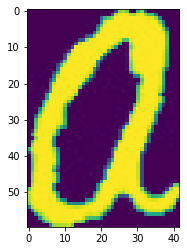

In [ ]:
from matplotlib.image import imread
img=imread('/data/processed/breta/words_gaplines/A_1513181559.8292634.png')
plt.imshow(img)

In [ ]:
ww = ["A_1513181559.8292634.png", "A_1513181559.8292636.png"]
print(ww[1].split('_'))

['A', '1513181559.8292636.png']


In [ ]:
#for i in os.listdir(words_path):
#  train2 = [io.imread()]
training = []
filelist=os.listdir(words_path)
for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
    if (fichier.endswith(".png")):
        training.append(fichier)
print(training[:5])

['hungry_1514294635.6984315.png', 'vcera_1513113488.1125703.png', 'nature_1513543382.8408701.png', 'stroj_1514324408.947093.png', 'jak_1513291159.7738807.png']


In [ ]:
gt = []
tag = []
for i in training:
  gg = i.split('_')
  gt.append(gg[0])
print(gt[:2])

['hungry', 'vcera']


In [ ]:
!pip install ipython-autotime

In [ ]:
%load_ext autotime

### PREPROCESSING

In [ ]:
df = pd.DataFrame()

time: 5.01 ms


In [ ]:
df['img'] = training[:int(0.5 * len(training))]

time: 10.6 ms


In [ ]:
df['label'] = gt[:int(0.5 * len(gt))]

time: 4.09 ms


In [ ]:
df.head()

,img,label
0,hungry_1514294635.6984315.png,hungry
1,vcera_1513113488.1125703.png,vcera
2,nature_1513543382.8408701.png,nature
3,stroj_1514324408.947093.png,stroj
4,jak_1513291159.7738807.png,jak


time: 21.2 ms


In [ ]:
ydf = pd.DataFrame()

time: 2.76 ms


In [ ]:
print(len(gt))

5069
time: 902 µs


In [ ]:
ydf['img'] = training[int(0.5 * len(training)):5068]

time: 5.69 ms


In [ ]:
ydf['label'] = gt[int(0.5 * len(gt)):5068]

time: 4.75 ms


In [ ]:
ydf.head()

,img,label
0,experience_1513543877.8435962.png,experience
1,life_1513544235.178952.png,life
2,velky_1513551389.0504284.png,velky
3,rec_1513531852.1567945.png,rec
4,look_1513541756.7586353.png,look


time: 15.1 ms


In [ ]:
#ydf.drop([2534])

time: 922 µs


In [ ]:
print(len(df),len(ydf))

2534 2534
time: 1.29 ms


In [ ]:
df1 = np.array(df)
df1.shape

(2534, 2)

time: 7.6 ms


In [ ]:
df2 = np.array(ydf)
df2.shape

(2534, 2)

time: 10.7 ms


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df1, df2, test_size=0.50)

time: 5.71 ms


In [ ]:
print(len(xtrain), "X", xtrain[:2])

1267 X [['jenom_1513550763.5944638.png' 'jenom']
 ['regular_1514295034.281417.png' 'regular']]
time: 1.31 ms


In [ ]:
print(len(ytrain), "L", len(gt), len(training))

1267 L 5069 5069
time: 4.64 ms


In [ ]:
from keras.preprocessing import image

time: 890 µs


In [ ]:
filelist=os.listdir(words_path)
print(filelist[:5])

['hungry_1514294635.6984315.png', 'Quart_1513620804.988006.txt', 'vcera_1513113488.1125703.png', 'nature_1513543382.8408701.png', 'nature_1513543382.8408701.txt']
time: 14.7 ms


In [ ]:
print(xtrain.shape)

(1267, 2)
time: 921 µs


In [ ]:
print(ytest.shape)

(1267, 2)
time: 1.35 ms


In [ ]:
def ss(i, j):
  cp = []
  for f in filelist[i:j]:
    if f.endswith(".png"):
      cp.append(f)
#  for u in range(0, batch_S):  
  #print(len(cp), " XX ", i, " X ", j)
  return cp
#  print(len(xtrain))

time: 2.79 ms


In [ ]:
def Loader(batch_size):
  sd = []
  bb = [0, 64]
  sd.append(ss(bb[0], bb[1]))
  for i in range(len(xtrain)):
    if 2 * bb[1] < len(xtrain) - 1:
      bb[0] = bb[1] 
      bb[1] = 2 * bb[0]
      sd.append(ss(bb[0], bb[1]))
  for l in sd:
    for x in l:
      print(x)
  #print("L: ", len(cp), len(xtrain), len(sd))
#for c in range(len(cp[1])):
 # print(cp[c])
Loader(64)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

time: 1.4 ms


In [ ]:
co = 0
for i in filelist:
  if i.endswith(".png"):
    if i not in kk:
      co += 1 
    #  print(i)
print(co, len(kk))

4547 522
time: 42.6 ms


In [ ]:
if 'Child_1514313714.461586.png' not in kk:
  print("L")

L
time: 1.3 ms


In [ ]:
tt = 0
for i in kk:
  cou = i.split("_")
  if cou not in gt:
    tt += 1
tt

522

time: 56.3 ms


In [ ]:
filelist=os.listdir(words_path)

time: 15.4 ms


In [ ]:
trt = LoadBatch(xtrain, ytrain, 100)
print(trt)

<generator object LoadBatch at 0x7f764c5d11a8>
time: 1.84 ms


In [ ]:
print(words_path)

/data/processed/breta/words_gaplines
time: 1.3 ms


In [ ]:
os.chdir(words_path)
os.listdir(words_path)

In [ ]:
!find 'hungry_1514294635.6984315.png'

find: ‘hungry_1514294635.6984315.png’: No such file or directory
time: 193 ms


### LOADER

In [ ]:
ko = []
kk = []
for i in sd:
  for j in i:
    #print(len(i), j)
    kk.append(j)
    ko.append(cv2.imread(f"{words_path}/" + j))
    #cv2_imshow(ko[1])
print(len(ko))
#print(ko)
#print(cp[2], "L")
#print("S: ",sd)

522
time: 91 ms


In [ ]:
def ImgLoad(batch_size):
  xx = []
  yy = []
  filelist=os.listdir(words_path)

In [ ]:
def LoadBatch(xdata, ydata, batch_size):
  xd = []
  yd = []
  img_l = []
  count = 1
  filelist=os.listdir(words_path)
  
  if (count % batch_size) < (batch_size):
    lim = (count % batch_size)
  else:
    lim = (len(filelist) - 1)
  
  l = len(xtrain)

  if lim == 0:
    lim = 1
  
  while True:
    for count in range(batch_size + 1):
      for fichier in filelist[:(count % batch_size)]: 
          if (fichier.endswith(".png")):
              img_l.append(image.load_img(fichier,  color_mode = 'grayscale', target_size=[28, 28]))
              count += 1

    #img = image.load_img([i for i in training[:Pointer % l]], color_mode = 'grayscale', target_size = [28, 28])
    #enhancer = ImageEnhance.Contrast(img)
    #img = ImageOps.grayscale(img)
    #factor = 0.5 #increase contrast
    #im_output = enhancer.enhance(factor)

    for img in img_l:
      img = image.img_to_array(img) / 255.0
      xd.append(img)
      yd.append([i for i in gt[count:lim]])
      #Pointer = Pointer + 1

    if len(xd) == batch_size:
      yield np.array(xd), np.array(yd)
      xd = []
      yd = []

time: 23.2 ms


## MODEL

In [ ]:
cmodel=Sequential()

cmodel.add(Conv2D(16,(3, 3),activation='relu',input_shape=(28,28,1)))
cmodel.add(MaxPool2D((2, 2)))
cmodel.add(Dropout(0.2))

cmodel.add(Conv2D(32,(3,3),activation='relu'))
cmodel.add(MaxPool2D((2, 2)))
cmodel.add(Dropout(0.2))

cmodel.add(Conv2D(64,(3, 3),activation='relu'))
cmodel.add(MaxPool2D((2, 2)))
cmodel.add(Dropout(0.2))

#cmodel.add(Conv2D(128,(3, 3),activation='relu'))
#cmodel.add(MaxPool2D((2, 2)))
#cmodel.add(Dropout(0.2))

#cmodel.add(Conv2D(512,(1, 1),activation='relu'))
#cmodel.add(MaxPool2D((1, 1)))
#cmodel.add(Dropout(0.2))

cmodel.add(Flatten())


#cmodel.add(Dense(256,activation='relu'))

cmodel.add(Dense(64, activation='relu'))

cmodel.add(Dense(32, activation='relu'))

cmodel.add(Dense(16, activation='softmax'))

cmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [ ]:
cmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

time: 15.5 ms


In [ ]:
batch_size = 100
train_data_generator = LoadBatch(xtrain, ytrain, batch_size)
valid_data_generator = LoadBatch(xtest, ytest, batch_size)

time: 1.7 ms


In [ ]:
tdg = 

In [ ]:
import keras

time: 1.17 ms


In [ ]:
xtrain.shape

(1267, 2)

time: 3.93 ms


In [ ]:
#X_train = pd.DataFrame()
#X_train = xtrain / 255.0
#X_train.head()

time: 708 µs


#### CALLBACK

In [ ]:
filepath_02="/content/drive/My Drive/OpenCV/Weights/z-1-ADweights-{val_accuracy:.4f}.h5"
checkpointing = keras.callbacks.ModelCheckpoint(filepath_02, monitor='val_accuracy', verbose=1, save_best_only = True, save_weights_only=True, mode='auto', period=1)
callbacks_l = [checkpointing]

time: 5.27 ms


In [ ]:
#cmodel.fit(xtrain, ytrain, epochs=5, validation_data= (xtest, ytest), callbacks = callbacks_l)
cmodel.fit(xtrain, ytrain, epochs = 5, verbose = 1 ,validation_data = (xtest, ytest), callbacks=callbacks_l)

Epoch 1/5


ValueError: ignored

time: 405 ms


In [ ]:
traint=[io.imread(f'{words_path}/' + i, as_gray=True) for i in training]

#plt.imshow(np.array(traint[:1]))
#print(np.array(traint[1]))

time: 5.29 s


In [ ]:
#a = np.expand_dims(traint[1], axis=0)
#plt.imshow(a)

time: 820 µs


In [ ]:
#te_mg = np.array([cv2.resize(image,(28,28)) for image in training])
#te_mg = te_mg[:,:,:,np.newaxis]
#te_mg.shape

time: 1.08 ms


## CNN MODEL 3

In [ ]:
cmodel=Sequential()

cmodel.add(Conv2D(32,(3, 3),activation='relu',input_shape=(28,28,1)))
cmodel.add(MaxPool2D((2, 2)))
cmodel.add(Dropout(0.2))

cmodel.add(Conv2D(64,(3,3),activation='relu'))
cmodel.add(MaxPool2D((2, 2)))
cmodel.add(Dropout(0.2))

cmodel.add(Conv2D(128,(3, 3),activation='relu'))
cmodel.add(MaxPool2D((2, 2)))
cmodel.add(Dropout(0.2))

#cmodel.add(Conv2D(128,(3, 3),activation='relu'))
#cmodel.add(MaxPool2D((2, 2)))
#cmodel.add(Dropout(0.2))

#cmodel.add(Conv2D(512,(1, 1),activation='relu'))
#cmodel.add(MaxPool2D((1, 1)))
#cmodel.add(Dropout(0.2))

cmodel.add(Flatten())


#cmodel.add(Dense(256,activation='relu'))

cmodel.add(Dense(128,activation='relu'))

cmodel.add(Dense(64,activation='relu'))

cmodel.add(Dense(62,activation='softmax'))

cmodel.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 3, 3, 128)       

In [ ]:
cmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
cmodel.fit(Trainx,Trainy,epochs=25,validation_data=(valx,valy))

Epoch 1/25


ValueError: ignored

time: 261 ms


In [ ]:
cmodel.fit(Trainx,Trainy,epochs=25,validation_data=(valx,valy),callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx,Trainy,epochs=25,validation_data=(valx,valy))

### TESTING

In [ ]:
lab1=[]
test1=[]
#import os
for i in os.listdir(f'{test_path}'):
    test1.append(io.imread(f'{test_path}'+i,as_gray=True))
    lab1.append(i.split('.')[0])

In [ ]:
test_img1=np.array([cv2.resize(image,(28,28)) for image in test])
test_img1=test_img1[:,:,:,np.newaxis]
test_img1.shape

(6220, 28, 28, 1)

In [ ]:
predictions1=cmodel.predict(test_img1)

predictions1=np.argmax(predictions1,axis=1)

In [ ]:
lit1=[]
for x in predictions1:
    lit1.append(mapp.get(x))
lit1

In [ ]:
cmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
cmodel.fit(Trainx,Trainy,epochs=30,validation_data=(valx,valy))

In [ ]:
cmodel.fit(Trainx,Trainy,epochs=30,validation_data=(valx,valy))

#### CALLBACK

In [ ]:
filepath_02="/content/z-1-weights-{val_accuracy:.4f}.h5"
checkpointing = keras.callbacks.ModelCheckpoint(filepath_02, monitor='val_accuracy', verbose=1, save_best_only = True, save_weights_only=True, mode='auto', period=1)
callbacks_l = [checkpointing]

#### FITTING

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=5, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=5, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=5, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
cmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

### TESTING

In [ ]:
lab2=[]
test2=[]
#import os
for i in os.listdir(f'{test_path}'):
    test2.append(io.imread(f"{test_path}"+i,as_gray=True))
    lab2.append(i.split('.')[0])

In [ ]:
test_img2=np.array([cv2.resize(image,(28,28)) for image in test2])
test_img2=test_img2[:,:,:,np.newaxis]
test_img2.shape

(6220, 28, 28, 1)

In [ ]:
predictions2=cmodel.predict(test_img2)

predictions2=np.argmax(predictions2,axis=1)

In [ ]:
print(predictions[:5])

[54 22 38 18 29]


In [ ]:
lit2=[]
for x in predictions[:5]:
    print(mapp.get(x), x)
    #lit.append(mapp.get(x))
#lit2

s 54
M 22
c 38
I 18
T 29


In [ ]:
lab3=[]
test3=[]
#import os
for i in range(10000, 10005):
    test3.append(io.imread(f"{test_path}"+str(i)+".Bmp",as_gray=True))
    lab3.append(str(i).split('.')[0])

In [ ]:
test_img3=np.array([cv2.resize(image,(28,28)) for image in test3])
test_img3=test_img3[:,:,:,np.newaxis]
test_img3.shape

(5, 28, 28, 1)

In [ ]:
predictions3=cmodel.predict(test_img3)

predictions3=np.argmax(predictions3,axis=1)

In [ ]:
print(predictions3[:5])

[29 14 44 29 13]


In [ ]:
lit3=[]
for x in predictions3:
    lit3.append(mapp.get(x))
lit3

['T', 'E', 'i', 'T', 'D']

In [ ]:
model.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
model.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
model.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

In [ ]:
model.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_l)

## CNN MODEL 4

In [ ]:
# MODEL 4
kmodel=Sequential()

kmodel.add(Conv2D(32,(2,2),activation='relu',input_shape=(28,28,1)))
kmodel.add(MaxPool2D((1,1)))
kmodel.add(Dropout(0.2))

kmodel.add(Conv2D(64,(2,2),activation='relu'))
kmodel.add(MaxPool2D((1,1)))
kmodel.add(Dropout(0.2))

kmodel.add(Conv2D(128,(2,2),activation='relu'))
kmodel.add(MaxPool2D((1,1)))
kmodel.add(Dropout(0.2))

kmodel.add(Conv2D(128,(2,2),activation='relu'))
kmodel.add(MaxPool2D((1,1)))
kmodel.add(Dropout(0.2))

kmodel.add(Flatten())

#model.add(Dense(512,activation='relu'))

#model.add(Dense(256,activation='relu'))
#kmodel.add(Dense(256,activation='relu'))

kmodel.add(Dense(128,activation='relu'))

kmodel.add(Dense(62,activation='softmax'))

kmodel.summary()

kmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 25, 25, 128)     

#### CALLBACK

In [ ]:
filepath_02="/content/z-1-weightsM3-{val_accuracy:.4f}.h5"
checkpointing = keras.callbacks.ModelCheckpoint(filepath_02, monitor='val_accuracy', verbose=1, save_best_only = True, save_weights_only=True, mode='auto', period=1)
callbacks_m = [checkpointing]

#### FITTING

In [ ]:
kmodel.fit(Trainx, Trainy, epochs=30, validation_data=(valx, valy), callbacks=callbacks_m)

In [ ]:
kmodel.fit(Trainx, Trainy, epochs=40, validation_data=(valx, valy), callbacks=callbacks_m)